In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
raw_data = pd.read_csv('generated_values.csv')
df = raw_data.copy()

In [64]:
raw_data.shape

(1000, 6)

In [65]:
df.head()

,fin_record_key,fin_debit_credit_ind,fin_company_id,fin_trans_dt,fin_source_amt,fin_acct_num
0,2693259,c,1936,2024-06-21,179.73,6011231234567890
1,5264506,d,1936,2024-11-25,450.87,6011231234567890
2,1857073,c,1936,2024-09-05,238.07,3782891012345678
3,1609887,c,1936,2024-06-30,210.59,4929173901234567
4,8234346,c,1936,2024-09-10,283.52,6011231234567890


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fin_record_key        1000 non-null   int64  
 1   fin_debit_credit_ind  1000 non-null   object 
 2   fin_company_id        1000 non-null   int64  
 3   fin_trans_dt          1000 non-null   object 
 4   fin_source_amt        1000 non-null   float64
 5   fin_acct_num          1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [67]:
df.shape

(1000, 6)

In [68]:
df.drop('fin_debit_credit_ind',axis=1,inplace=True)

In [69]:
df.head()

,fin_record_key,fin_company_id,fin_trans_dt,fin_source_amt,fin_acct_num
0,2693259,1936,2024-06-21,179.73,6011231234567890
1,5264506,1936,2024-11-25,450.87,6011231234567890
2,1857073,1936,2024-09-05,238.07,3782891012345678
3,1609887,1936,2024-06-30,210.59,4929173901234567
4,8234346,1936,2024-09-10,283.52,6011231234567890


In [70]:
df.fin_acct_num.nunique()

3

In [71]:
df['fin_trans_dt'] = pd.to_datetime(df['fin_trans_dt'])
result = df.groupby([df['fin_trans_dt'], 'fin_company_id']).agg({'fin_source_amt': 'sum', 'fin_company_id': 'count'}).rename(columns={'fin_source_amt': 'Sum_amt', 'fin_company_id': 'Count'}).reset_index()

In [72]:
result.head()

,fin_trans_dt,fin_company_id,Sum_amt,Count
0,2024-01-01,1936,908.73,3
1,2024-01-01,2001,318.81,1
2,2024-01-02,1936,881.78,2
3,2024-01-02,2001,1082.13,3
4,2024-01-03,1936,623.17,2


In [73]:
result.shape

(564, 4)

In [74]:
unique_ids = df['fin_company_id'].unique()

In [75]:
dfs = {}
for company_id in unique_ids:
    dfs[company_id] = result[result['fin_company_id'] == company_id]

In [76]:
df_1 = dfs[1936]

In [77]:
df_2 = dfs[2001]

In [78]:
df_1.shape

(283, 4)

In [79]:
df_2.shape

(281, 4)

In [80]:
df_1 = df_1.sort_values('fin_trans_dt')

In [81]:
df_1.set_index('fin_trans_dt',inplace=True)

In [21]:
df_1.head()

,fin_company_id,Sum_amt,Count
fin_trans_dt,,,
2024-01-01,1936,908.73,3
2024-01-02,1936,881.78,2
2024-01-03,1936,623.17,2
2024-01-05,1936,637.33,2
2024-01-09,1936,36.36,1


In [22]:
df_1 = df_1.asfreq('d')
# data_3 = data_3.fillna(method='ffill')

In [23]:
df_1.head()

,fin_company_id,Sum_amt,Count
fin_trans_dt,,,
2024-01-01,1936.0,908.73,3.0
2024-01-02,1936.0,881.78,2.0
2024-01-03,1936.0,623.17,2.0
2024-01-04,NaN,NaN,NaN
2024-01-05,1936.0,637.33,2.0


In [24]:
df_1 = df_1.fillna(method='ffill')

In [25]:
df_1.reset_index(inplace=True)

# Rename the date index to a column named "date"
df_1.rename(columns={'fin_trans_dt': 'date'}, inplace=True)

In [26]:
df_1['fin_trans_date'] = df_1['date']

In [27]:
df_1.set_index('date',inplace=True)

In [28]:
df_1['year'] = df_1['fin_trans_date'].dt.year
df_1['month'] = df_1['fin_trans_date'].dt.month
df_1['day'] = df_1['fin_trans_date'].dt.day

In [29]:
df_1.columns

Index(['fin_company_id', 'Sum_amt', 'Count', 'fin_trans_date', 'year', 'month',
       'day'],
      dtype='object')

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fin_company_id  366 non-null    float64       
 1   Sum_amt         366 non-null    float64       
 2   Count           366 non-null    float64       
 3   fin_trans_date  366 non-null    datetime64[ns]
 4   year            366 non-null    int32         
 5   month           366 non-null    int32         
 6   day             366 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 18.6 KB


In [31]:
#Splitting data
size = int(len(df_1)*0.8)
df_train,df_test = df_1.iloc[:size],df_1.iloc[size:]

In [32]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA

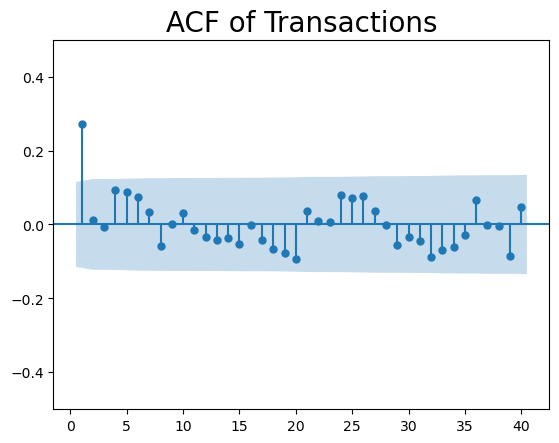

In [33]:
sgt.plot_acf(df_train['Sum_amt'],zero=False,lags=40)
plt.title('ACF of Transactions',size=20)
plt.ylim(-0.5,0.5)
plt.show()

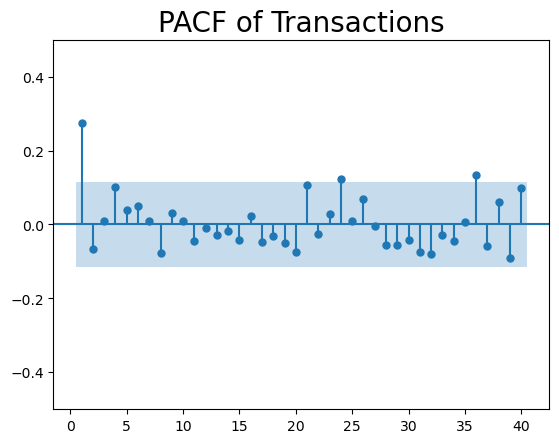

In [34]:
sgt.plot_pacf(df_train['Sum_amt'],zero=False,lags=40,method='ols')
plt.title('PACF of Transactions',size=20)
plt.ylim(-0.5,0.5)
plt.show()

In [35]:
sts.adfuller(df_train['Sum_amt'])

(-12.866356068498014,
 4.985564383994815e-24,
 0,
 291,
 {'1%': -3.4530232710482367,
  '5%': -2.871523926671883,
  '10%': -2.5720897694878424},
 3914.1143048373087)

In [36]:
df_test.tail()

,fin_company_id,Sum_amt,Count,fin_trans_date,year,month,day
date,,,,,,,
2024-12-27,1936.0,1044.85,5.0,2024-12-27,2024,12,27
2024-12-28,1936.0,176.80,1.0,2024-12-28,2024,12,28
2024-12-29,1936.0,409.83,2.0,2024-12-29,2024,12,29
2024-12-30,1936.0,396.65,1.0,2024-12-30,2024,12,30
2024-12-31,1936.0,1529.64,4.0,2024-12-31,2024,12,31


In [37]:
#set start and end date

start_date = "2024-10-19"
end_date = "2024-12-31"

D:\Users\vtpavithra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Users\vtpavithra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Users\vtpavithra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Users\vtpavithra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Users\vtpavithra\AppData\Local\anaconda3\Lib\site-packa

                               SARIMAX Results                                
Dep. Variable:                Sum_amt   No. Observations:                  292
Model:               ARIMA(25, 1, 24)   Log Likelihood               -1915.301
Date:                Thu, 07 Mar 2024   AIC                           3936.602
Time:                        10:42:31   BIC                           4131.289
Sample:                    01-01-2024   HQIC                          4014.595
                         - 10-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
month         -1.2352     13.294     -0.093      0.926     -27.292      24.821
day           -4.2721      2.165     -1.974      0.048      -8.515      -0.030
Count        245.8779     13.086     18.790      0.0

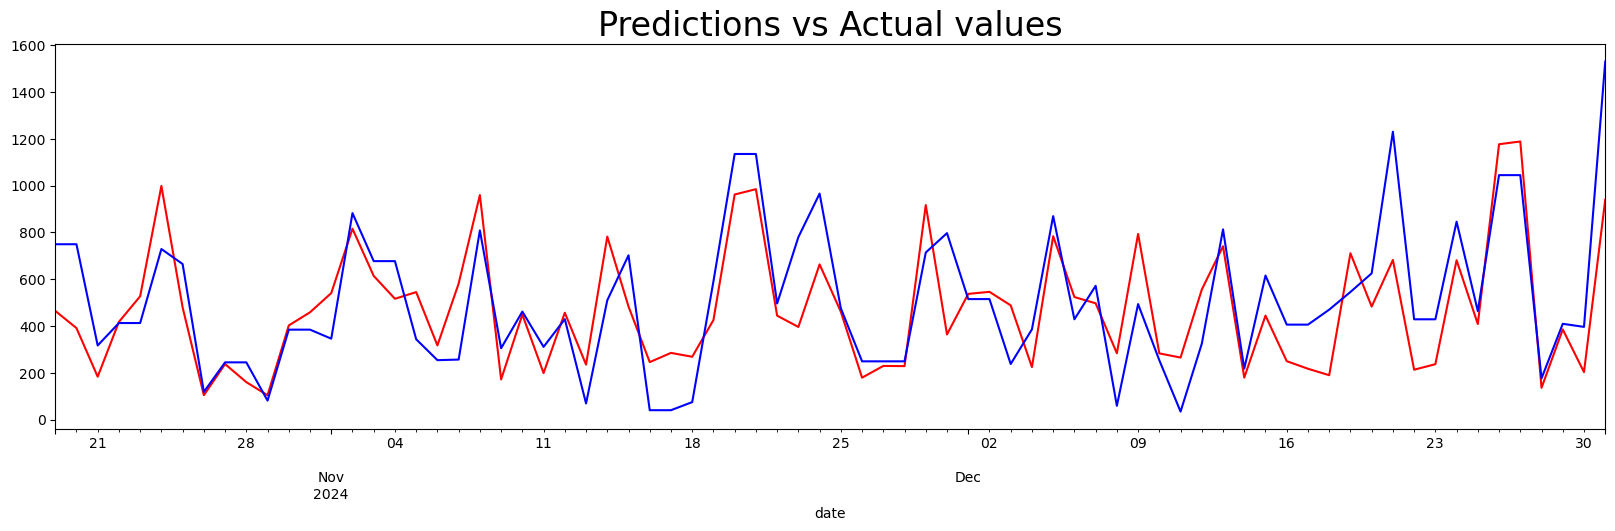

In [38]:
#ARIMAX(1,1,1)

start_date = "2024-10-19"
end_date = "2024-12-31"

model_ar_1_i_ma_1 = ARIMA(df_train['Sum_amt'],order=(25,1,24),exog=df_train[['month','day','Count']])
results_ar_1_i_ma_1 = model_ar_1_i_ma_1.fit()
print(results_ar_1_i_ma_1.summary())

df_pred_ar_1_i_ma_1 = results_ar_1_i_ma_1.predict(start=start_date,end=end_date,exog=df_test[['month','day','Count']][start_date:end_date])

df_pred_ar_1_i_ma_1[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.Sum_amt[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual values",size=24)
plt.show()

In [49]:
df_1_ap = pd.DataFrame([df_test.Sum_amt[start_date:end_date],df_pred_ar_1_i_ma_1[start_date:end_date]])

In [61]:
df_1_ap.transpose()

AttributeError: 'NoneType' object has no attribute 'transpose'

In [60]:
df_1_ap

In [42]:
print(df_pred_ar_1_i_ma_1[start_date:end_date])

2024-10-19    465.146504
2024-10-20    391.605724
2024-10-21    183.909884
2024-10-22    418.188783
2024-10-23    527.429886
2024-10-24    998.628653
2024-10-25    479.893799
2024-10-26    104.884888
2024-10-27    237.817553
2024-10-28    160.640795
2024-10-29    104.703403
Freq: D, Name: predicted_mean, dtype: float64


In [43]:
print(df_test.Sum_amt[start_date:end_date])

date
2024-10-19    749.69
2024-10-20    749.69
2024-10-21    317.29
2024-10-22    413.15
2024-10-23    413.15
2024-10-24    729.14
2024-10-25    665.16
2024-10-26    118.89
2024-10-27    245.18
2024-10-28    245.18
2024-10-29     81.74
Name: Sum_amt, dtype: float64


In [35]:
df_2.head()

,fin_trans_dt,fin_company_id,Sum_amt,Count
1,2024-01-01,2001,318.81,1
3,2024-01-02,2001,1082.13,3
5,2024-01-03,2001,477.02,3
6,2024-01-04,2001,251.85,1
8,2024-01-05,2001,398.50,1


In [36]:
df_2 = df_2.sort_values('fin_trans_dt')

In [37]:
df_2.set_index('fin_trans_dt',inplace=True)

In [38]:
df_2 = df_2.asfreq('d')

In [39]:
df_2.head()

,fin_company_id,Sum_amt,Count
fin_trans_dt,,,
2024-01-01,2001.0,318.81,1.0
2024-01-02,2001.0,1082.13,3.0
2024-01-03,2001.0,477.02,3.0
2024-01-04,2001.0,251.85,1.0
2024-01-05,2001.0,398.50,1.0


In [40]:
df_2 = df_2.fillna(method='ffill')

In [41]:
#Splitting data
size = int(len(df_2)*0.8)
df_2_train,df_2_test = df_2.iloc[:size],df_2.iloc[size:]

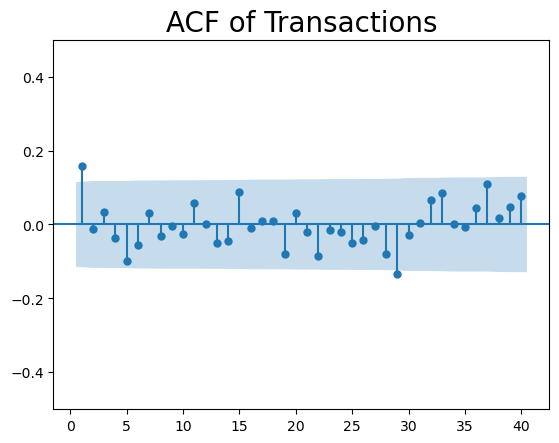

In [42]:
sgt.plot_acf(df_2_train['Sum_amt'],zero=False,lags=40)
plt.title('ACF of Transactions',size=20)
plt.ylim(-0.5,0.5)
plt.show()

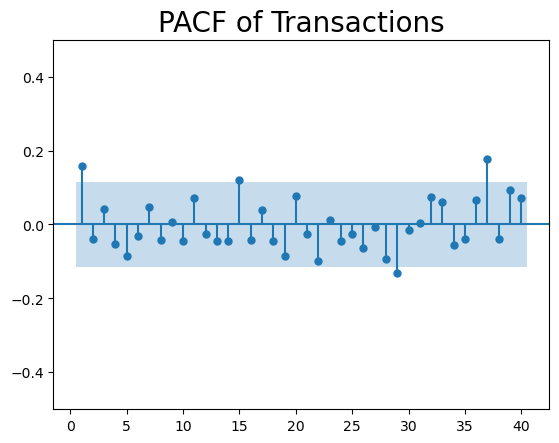

In [43]:
sgt.plot_pacf(df_2_train['Sum_amt'],zero=False,lags=40,method='ols')
plt.title('PACF of Transactions',size=20)
plt.ylim(-0.5,0.5)
plt.show()

In [44]:
sts.adfuller(df_2_train['Sum_amt'])

(-14.481720041341053,
 6.356436845190534e-27,
 0,
 291,
 {'1%': -3.4530232710482367,
  '5%': -2.871523926671883,
  '10%': -2.5720897694878424},
 3821.0808176203473)

In [45]:
df_2_test.tail()

,fin_company_id,Sum_amt,Count
fin_trans_dt,,,
2024-12-27,2001.0,593.63,2.0
2024-12-28,2001.0,430.34,1.0
2024-12-29,2001.0,400.83,1.0
2024-12-30,2001.0,400.83,1.0
2024-12-31,2001.0,343.41,2.0


In [46]:
#set start and end date

start_date = "2024-10-19"
end_date = "2024-12-31"

                               SARIMAX Results                                
Dep. Variable:                Sum_amt   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1902.875
Date:                Tue, 05 Mar 2024   AIC                           3813.750
Time:                        23:57:11   BIC                           3828.444
Sample:                    01-01-2024   HQIC                          3819.636
                         - 10-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Count        241.5590     11.129     21.704      0.000     219.746     263.372
ar.L1          0.2164      0.053      4.045      0.000       0.112       0.321
ma.L1         -0.9998      0.498     -2.007      0.0

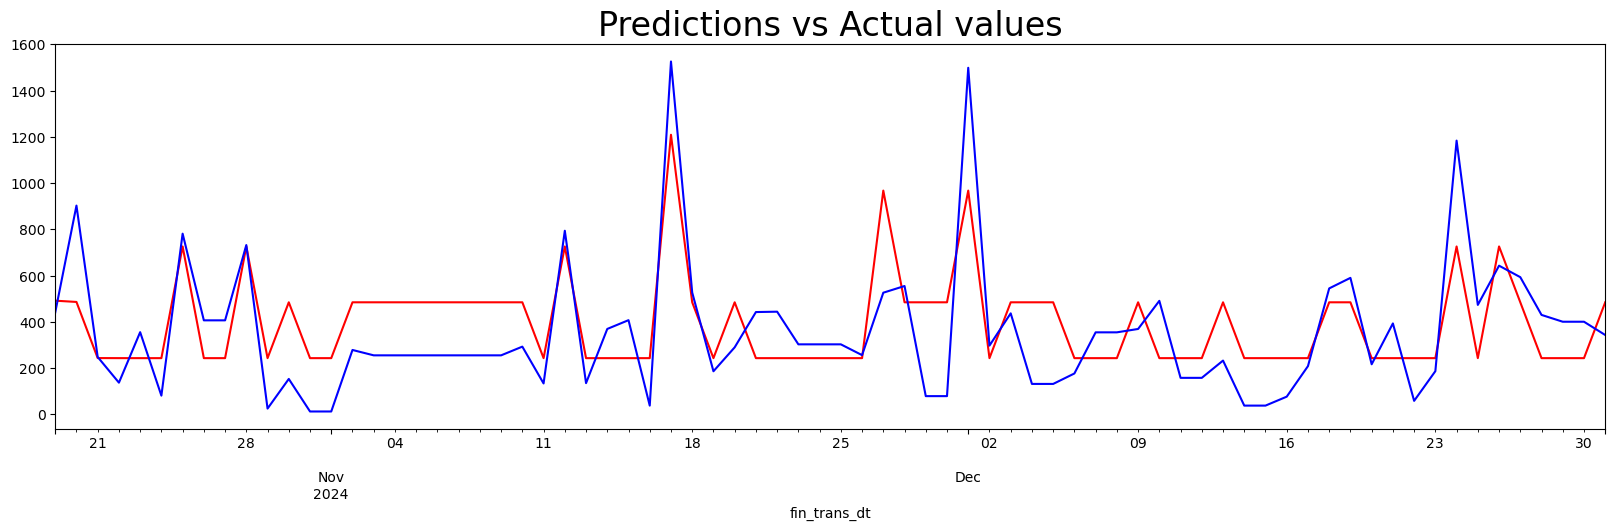

In [47]:
#ARIMAX(1,1,1)

model_2_ar_1_i_ma_1 = ARIMA(df_2_train['Sum_amt'],order=(1,1,1),exog=df_2_train['Count'])
results_2_ar_1_i_ma_1 = model_2_ar_1_i_ma_1.fit()
print(results_2_ar_1_i_ma_1.summary())

df_pred_2_ar_1_i_ma_1 = results_2_ar_1_i_ma_1.predict(start=start_date,end=end_date,exog=df_2_test['Count'][start_date:end_date])

df_pred_2_ar_1_i_ma_1[start_date:end_date].plot(figsize=(20,5),color="red")
df_2_test.Sum_amt[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual values",size=24)
plt.show()

In [48]:
print(df_pred_2_ar_1_i_ma_1[start_date:end_date])

2024-10-19    491.904022
2024-10-20    486.400341
2024-10-21    243.650398
2024-10-22    243.392709
2024-10-23    243.336950
                 ...    
2024-12-27    484.880599
2024-12-28    243.321553
2024-12-29    243.321553
2024-12-30    243.321553
2024-12-31    484.880599
Freq: D, Name: predicted_mean, Length: 74, dtype: float64


In [49]:
print(df_2_test.Sum_amt)

fin_trans_dt
2024-10-19    440.79
2024-10-20    903.14
2024-10-21    248.31
2024-10-22    137.28
2024-10-23    355.68
               ...  
2024-12-27    593.63
2024-12-28    430.34
2024-12-29    400.83
2024-12-30    400.83
2024-12-31    343.41
Freq: D, Name: Sum_amt, Length: 74, dtype: float64


In [50]:
from pmdarima.arima import auto_arima

In [53]:
model_1 = auto_arima(df_train['Sum_amt'],start_p=1,start_q=1,start_P=1,start_Q=1,max_p=10,max_q=10,max_P=10,max_Q=10,max_order=20,seasonal=False)

In [54]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -2074.932
Date:                Wed, 06 Mar 2024   AIC                           4155.865
Time:                        00:02:51   BIC                           4166.895
Sample:                    01-01-2024   HQIC                          4160.283
                         - 10-18-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    446.8818     25.884     17.265      0.000     396.151     497.613
ma.L1          0.2819      0.050      5.591      0.000       0.183       0.381
sigma2      8.702e+04   6778.493     12.837      0.000    7.37e+04       1e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                51.08
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.88
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""